In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def canny(image) :
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray,(5,5),0)
    canny_image = cv2.Canny(blur,50,150)
    return canny_image

def region_of_interest(image) :
    h = image.shape[0]
    w = image.shape[1]
    polygons = np.array([[(20,h),(w-20,h),(w//2,h//2-50)]])
    mask = np.zeros_like(image)
    cv2.fillPoly(mask,polygons,255)
    mask_image = cv2.bitwise_and(image,mask)
    return mask_image

def display_lines(image,lines):
    line_image = np.zeros_like(image)
    if lines is not None :
        for line in lines:
            x1,y1,x2,y2 = line.reshape(4)
            cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)
    return line_image

def make_coor(image,line_params) :
    slope,intercept = line_params
    y1 = image.shape[0]
    y2 = int(y1*(3/5))
    x1 = int((y1 - intercept)/slope)
    x2 = int((y2 - intercept)/slope)
    return np.array([x1,y1,x2,y2])

def average_slope_intercept(image,lines) :
    left_fit = []
    right_fit = []
    for line in lines :
        x1,y1,x2,y2 = line.reshape(4)
        params = np.polyfit((x1,x2),(y1,y2),1)
        slope = params[0]
        intercept = params[1]
        if slope < 0 :
            left_fit.append((slope,intercept))
        else :
            right_fit.append((slope,intercept))
    left_fit_average = np.average(left_fit,axis=0)
    right_fit_average = np.average(right_fit,axis=0)
    left_line =  make_coor(image,left_fit_average)
    right_line = make_coor(image,right_fit_average)
    return np.array([left_line,right_line])

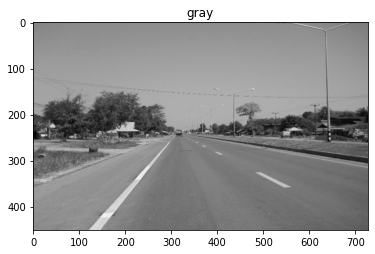

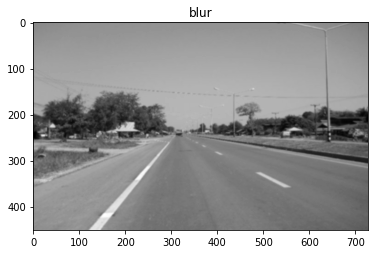

In [3]:
image = cv2.imread("./datasets/road_1.jpg")
lane_image = np.copy(image)
lane_image = cv2.cvtColor(lane_image,cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(lane_image,cv2.COLOR_RGB2GRAY)
blur = cv2.GaussianBlur(gray,(5,5),0)
plt.title('gray')
plt.imshow(gray,cmap='gray')
plt.show()
plt.title('blur')
plt.imshow(blur,cmap='gray')
plt.show()

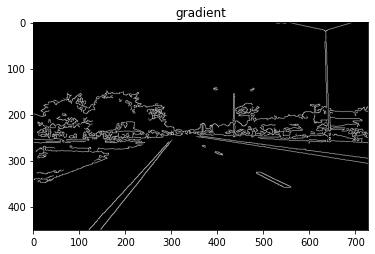

In [4]:
canny_image = canny(lane_image)
plt.title('gradient')
plt.imshow(canny_image,cmap='gray')
plt.show()

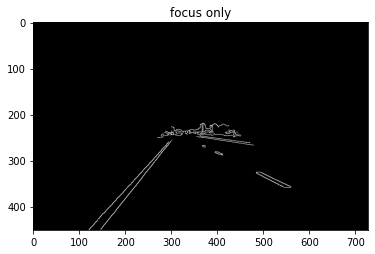

In [5]:
res = region_of_interest(canny_image)
plt.title('focus only')
plt.imshow(res,cmap='gray')
plt.show()


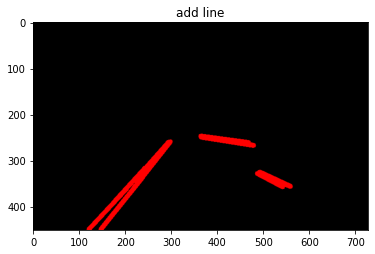

In [6]:
thres = 100
lines = cv2.HoughLinesP(res,2,np.pi/180,thres,np.array([]),minLineLength=40,maxLineGap=5)
line_image = display_lines(lane_image,lines)
plt.title('add line')
plt.imshow(line_image,cmap='gray')
plt.show()


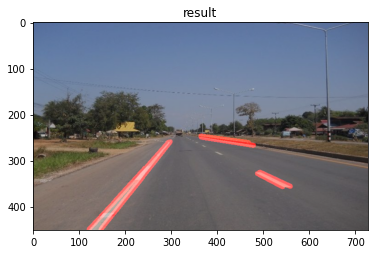

In [7]:
combine = cv2.addWeighted(lane_image, 0.8, line_image, 1, 1)
plt.title('result')
plt.imshow(combine,cmap='gray')
plt.show()

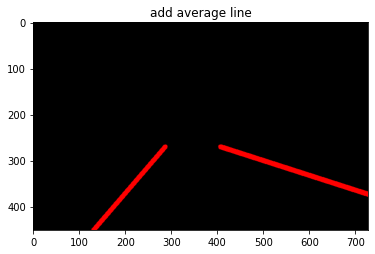

In [8]:
average_lines = average_slope_intercept(lane_image,lines)
average_line_image = display_lines(lane_image,average_lines)
plt.title('add average line')
plt.imshow(average_line_image,cmap='gray')
plt.show()

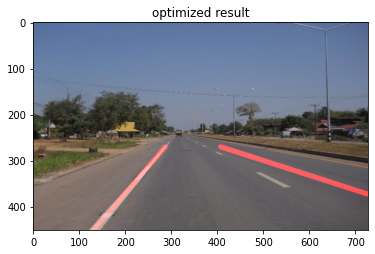

In [9]:
combine_average = cv2.addWeighted(lane_image, 0.8, average_line_image, 1, 1)
plt.title('optimized result')
plt.imshow(combine_average,cmap='gray')
plt.show()